In [1]:
# l=list(range(5))

# %timeit l=[x**2 for x in range(1000)]

%%timeit 
l=[]
for i in range(1000):
    l.append(i**2)


UsageError: Line magic function `%%timeit` not found.


In [ ]:
import timeit

s = """
L = []
for n in range(10):
    L.append(2 ** n)
    """
timeit.timeit(s)

print(In[6])

In [2]:
# ******************************************************NUMPY*******************************************************************
import numpy
numpy.__version__

'1.20.1'

In [21]:
import numpy as np

np.random.seed(0)

one=np.random.randint(10, size=6)
two=np.random.randint(10, size=(3,4))
three=np.random.randint(10, size=(3,4,5))

three.shape
three.size
three.ndim

three.dtype #int32= 32 bits (itemsize=4 bytes (4 bytes x 8 bits = 32 bits))
three.itemsize # 4 bytes
three.nbytes #240 bytes = size x itemsize = 60 items x 4 bytes


240

In [30]:
np.random.seed(0)
x= np.random.randint(1, 10, size=(3,4))

x

array([[6, 1, 4, 4],
       [8, 4, 6, 3],
       [5, 8, 7, 9]])

In [34]:
x[:2,:2]
x[:3, ::2] # all rows, every other column
x[::-1,::-1] # reverse columns and rows
x[0]==x[0, :] #first row, all columns


array([ True,  True,  True,  True])

In [252]:
# reshape:
x=np.arange(12).reshape(2,2,3) # 2*2*3=12

# -1 put everything else in the axis - declaring shape at the end:
y=np.arange(12).reshape(-1,3,1) # is equal reshape(4,3,1) -> 12/(1*3)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [38]:
# Python lists slices VS Numpy array slices = in NumPy they return views rather than copies of the array data.
# assigning a part of the array to the variable, and then modifying that variable will result in oryginal array:
x_part=x[:2, :2]
x_part[0,0]=20
x

# if the original array should not be modified - the copy method should be used when extracting subarray:
x_part=x[:2,:2].copy()

array([[20,  1,  4,  4],
       [ 8,  4,  6,  3],
       [ 5,  8,  7,  9]])

In [45]:
# conversion 1D array -> 2D array (reshape method or newaxis):
np.random.seed(0)
y=np.random.randint(10, size=3)
y.reshape(1,3) #2D array: one row, three columns or:
y[np.newaxis,:] 

array([[5, 0, 3]])

In [51]:
# CONCATENATE:
# a) vertically
grid = np.array([[1, 2, 3],
                [4, 5, 6]])
np.concatenate([grid, grid]) #default axis=0

#the same result:
np.vstack([grid,grid])

# b) horizontally:
np.concatenate([grid,grid], axis=1)
np.hstack([grid,grid])


array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [56]:
# SPLIT:
x=np.array([1, 2, 3, 99, 99, 3, 2, 1])

x1, x2, x3 = np.split(x, [3,5]) #values in the square brackets are indexes indicating places where array should be splitted 0-3, 3-5, 5~
x1, x2, x3

# vertically/horizontally:
x=np.array([[ 0, 1, 2, 3],
            [ 4, 5, 6, 7],
            [ 8, 9, 10, 11],
            [12, 13, 14, 15]])

x1, x2 = np.vsplit(x, [2]) # split after 2-nd row
x1,x2

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]]))

In [76]:
import timeit

s="""
import numpy as np
def reciprocals(values):
    result=np.empty(len(values))
    for i in range(len(values)):
        result[i]=1/values[i]
    return result


big_array=np.random.randint(1, 1000, size=1000000)
reciprocals(big_array)
"""
# timeit.timeit(s)

def reciprocals(values):
    result=np.empty(len(values))
    for i in range(len(values)):
        result[i]=1/values[i]
    return result


big_array=np.random.randint(1, 1000, size=1000000)
reciprocals(big_array)

%timeit reciprocals(big_array)

# NUMPY:
%timeit 1/big_array

748 ms ± 25.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.38 ms ± 201 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [94]:
# STORING CALCULATION RESULTS IN ANOTHER ARRAY:
x=np.arange(5)
y=np.empty(5)
np.multiply(x, 10, out=y)
y

array([ 0., 10., 20., 30., 40.])

In [99]:
# AGGREGATES:
# in case of multidimensional arrays very important to use numpy functions instead of python - might produce unintended results

x=np.arange(1,6)
np.add.reduce(x) # the same as x.sum()

#storing intermediate results of the computation:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Maximum height:  193
25th percentile:  174.25
Median:  182.0
75th percentile:  183.0


Text(0, 0.5, 'count')

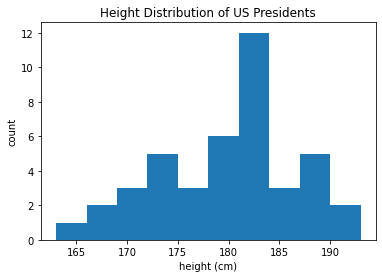

In [122]:
# EXERCISE - csv file - president_heights
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/president_heights.csv')
df.head()
heights=np.array(df['height(cm)'])

#statistics;
print("Mean height: ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())
print("25th percentile: ", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

# or in pandas:
df.describe()

plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('count')


In [125]:
# AGGREGATIONS ON MULTIDIMENSIONAL ARRAYS:
a = np.array([0, 1, 2])
b=np.ones((3,3))
a+b

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [137]:
M = np.ones((2, 3))
a = np.arange(3)
M+a
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
a+b

# ERROR:
M = np.ones((3, 2))
a = np.arange(3)
# M +a # error
# but:
a=a[:, np.newaxis]
a+M #correct

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75
Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


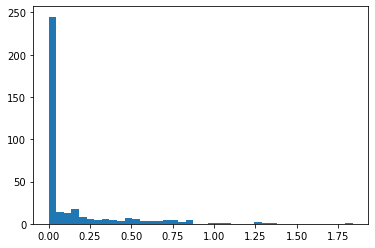

In [169]:
# EXERCISE 2 

df=pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/Seattle2014.csv')
rainfall=df.PRCP.values
inches=rainfall/254  # 1 inch=2,54 cm=254mm
inches.shape # 365 - for each day

plt.hist(inches, bins=40)
# number of days with inches between 0.5 and 1:
np.sum((inches>0.5)&(inches<1))

print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) & (inches < 0.2)))

# MASKS:
rainy=(inches>0) #output=boolean array 

# construct a mask of all summer days (June 21st is the 172nd day) - till 90 days after 172-nd day 
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0) 

print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

In [165]:
# BOOLEAN ARRAYS:
# the number of true values - after implementing conditional statement:
x=np.array([[5, 0, 3, 3],
            [7, 9, 3, 5],
            [2, 4, 7, 6]])
np.count_nonzero(x<3) # the same as np.sum(x<3) adding axis=1 searching in row np.sum(x<3, axis=1)

# AND and OR perform a single Boolean evaluation on an entire object, 
# while & and | perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object. 
# For Boolean NumPy arrays, the latter (& and |) is nearly always the desired operation.

# SO:
# A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
# B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
# A|B = correct
# A or B = error - it compares the whole object, no its particular elements


Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


In [186]:
# FANCY INDEXING:
# assing an array of indices to access multiple array elements at once
x=np.array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])
index=[3,5,9]
x[index] # = array([71, 20, 74])


# or: 2D array *****************************************************************
index=np.array([[3, 7],
                [4, 5]])

x[index] # result 2D array: array([[71, 86],
#                                 [60, 20]])


# indexing rows and columns as arrays:******************************************
X=np.array([[ 0, 1, 2, 3],
            [ 4, 5, 6, 7],
            [ 8, 9, 10, 11]])

row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

X[row,col] # = (0,2) (1,1) (2,3) =result array[2,5,11]

# ******************************************************************************
X[2, [2, 0, 1]] #= X[[2,2,2],[2, 0, 1]]


array([ 2, 63, 44, 20, 77, 25, 37, 24, 53, 81, 31, 47, 45, 65, 92, 18, 41,
       75, 21, 95])

In [203]:
x=np.array([2, 1, 4, 3, 5])
np.argmin(x[1:]) # indicates the index of minimum value
x[:-1]

array([2, 1, 4, 3])

In [243]:
# STRUCTURED ARRAY - compound data types:
data=np.zeros(4, dtype={'names':['name', 'age', 'weight'],
                       'formats':['U10', 'i4', 'f8']})
data.dtype

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [244]:
#filling structured array with data:
data['name'] = ['Alice', 'Bob', 'Cathy', 'Doug']
data['age'] = [25,45,37,19]
data['weight'] = [55.0, 85.5, 68, 61.5]
data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [249]:
data['name']
data[data['age']<30]['name']
type(data)

numpy.ndarray

In [260]:
# ****************************************************PANDAS********************************************************************
import pandas 
dir(pandas)
pd.__version__

'1.2.4'

In [269]:
# NUMPY_array vs PANDAS_Series: The essential difference is the presence of the index: while the NumPy array has an implicitly defined integer index used
# to access the values, the Pandas Series has an explicitly defined index associated with the values.

x=pd.Series([4,6,7,3,0], index=['a', 'b', 'c', 'd', 'e'])
type(x.values)
x.index

x=pd.Series({'a':4,'b':6,'c':7,'d':3,'e':0}, index=['a', 'e', 'c']) #dictionary 
# if Series created from a list - index length = list length ()
# x=pd.Series({'a':4,'b':6,'c':7,'d':3,'e':0}, index=['a', 'e', 'c']) ERROR

a    4
e    0
c    7
dtype: int64

In [315]:
x=pd.Series({'a':4,'b':6,'c':7,'d':3,'e':0}, index=['a', 'e', 'c'])

x.index # Series the same as:
x.keys() #dictionary

x.values # Series the same as:
x.items() #dictionary

array([4, 0, 7], dtype=int64)

In [271]:
# converting dictionary into pd.Series:indexes = sorted keys

population_dict = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,
                    'Florida': 19552860,
                    'Illinois': 12882135}
population = pd.Series(population_dict)
# slicing:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [292]:
# DATAFRAME:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
area=pd.Series(area_dict)

df=pd.DataFrame({'population':population,
               'area':area})

df2=pd.DataFrame({'a':i, 'b':i**2, 'c':np.sqrt(i)} for i in range(1,5))
df2.columns=['number', 'power', 'squere root']
df2

,number,power,squere root
0,1,1,1.000000
1,2,4,1.414214
2,3,9,1.732051
3,4,16,2.000000


In [300]:
# One difference between Index objects and NumPy arrays is that indices are immutable—that is, they cannot be modified

# defining index and column names:
df3= pd.DataFrame(np.random.randint(20, size=(5,3)),
                 columns=['col1', 'col2', 'col3'],
                 index=['a', 'b', 'c', 'd', 'e'])
df3

,col1,col2,col3
a,18,4,2
b,16,3,2
c,10,13,16
d,7,9,0
e,10,18,11


In [380]:
# implicit versus explicit slicing:
df3['a':'c'] # the last element included (loc) =df3.loc['a':'c']
df3[0:2] # the last element excluded (iloc) =df3.iloc[:2]

# LOC: slicing that always references the explicit index (using index names)
df3.loc['a', 'col1':'col3'] # 1 row, 3 columns

# ILOC: slicing that always references the implicit Python-style index (using numbers of rows/columns - its position in the DF)
df3.iloc[0] 
df3.iloc[0:2, 0:2] # 0, 1 rows & 0,1 columns

# df3[1:3] - slicing rows only, if rows and columns => iloc[1:3, 2]

,col1,col2,col3
a,18,4,2
b,16,3,2
c,10,13,16
d,7,9,0
e,10,18,11


In [319]:
type(df3.index)
# pandas.core.indexes.base.Index - data type Index might be used to compute unions, intersections, differences, and other combinations:

indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

indA & indB # intersection the same as:
indA.intersection(indB)

<ipython-input-319-412898ef844c>:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  indA & indB # intersection the same as:


Int64Index([3, 5, 7], dtype='int64')

In [348]:
# unions, intersections, differences etc. migh be used to extract part of SERIES or DATAFRAMES:

s=pd.Series(np.arange(15,20),index=[1, 3, 5, 7, 9])
k=indA.intersection(indB)
s[k]

3    16
5    17
7    18
dtype: int32

In [383]:
d=pd.DataFrame({'a':np.arange(15,20), 
               'b':np.arange(25,30)},
                index=[1, 3, 5, 7, 9]) 
d.loc[k]
d
d.loc[3]

a    16
b    26
Name: 3, dtype: int32

In [397]:
# DATAFRAME - DATA SELECTION:
# attribute-style access:
df3.col1 is df3['col1']  # True
# it doesn't work for some cases e.g. when column name is the same as method

# idxmax() - returns the index of the highest valued item in a series 
# True is higher than False - helpful in case of conditional statements:
df3[df3['col1']==18].idxmax()['col1']


'a'

In [422]:
# EXERCISES:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data
data.values
data.T # transposition

data['density']= data['pop'] / data['area']
data.iloc[1:3, 2]


rng=np.random.RandomState(42)
A=pd.DataFrame(rng.randint(20, size=(2,2)), columns=list('AB'))
B=pd.DataFrame(rng.randint(30,size=(3,3)), columns=list('BAC')) # summary based on columns names not position
A+B 
A.stack().mean() # counts mean for the whole dataframe
A.mean() # counts mean for each column

A    10.0
B    14.5
dtype: float64

In [437]:
rng=np.random.RandomState(42)
A = rng.randint(10, size=(3, 4))
df=pd.DataFrame(A, columns=list('QRST'))
df-df.iloc[0]

df.subtract(df.R, axis=0)
halfrow=df.iloc[0, ::2]
halfrow

Q    6
S    7
Name: 0, dtype: int32

In [453]:
# *************************************************HANDLING MISSING DATA********************************************************
columns_with_miss = df.isna().sum()
columns_with_miss =columns_with_miss[columns_with_miss!=0]  # series of columns where are missing values
columns_with_miss.sort_values(ascending=False)


# None - Python object, can be used only in arrays with data type 'object'
x = np.array([1, None, 3, 4])
# x = np.array([1, None, 3, 4], dtype=int) #error
# x -> out: array([1, None, 3, 4], dtype=object) dtype=object - any operations on the data will be done at the Python level(slower)

# NaN - not a number - a special floating-point value, Regardless of the operation, the result of arithmetic with NaN will be another NaN
# including NaN into the array of dtype=int will automatically convert dtype to float
x=pd.Series([1, np.nan, 2, None])
x[x.notnull()]

# dropna() - thresh parameter determines the minimum value of non-na items, if row/column contains less non-na values -it's dropped 
# fillna() -> methods: ffill -propagates the previous value forward, if a previous value is not available during a forward fill, the NA value remains. 
#                      bfill-propagates the next values backward


In [ ]:
# MULTI-INDEXING=HIERARCHICAL INDEXING - higher-dimensional data can be compactly represented within the familiar 
# one-dimensional Series and two-dimensional DataFrame objects.

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

# BETTER WAY:
index = pd.MultiIndex.from_tuples(index)
pop=pop.reindex(index)
pop

if you pass a dictionary with appropriate tuples as keys, Pandas will automatically
recognize this and use a MultiIndex by default

In [462]:
pop[:, 2010] # for the year 2010

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [474]:
# UNSTACK() - convert a multiplyindexed Series into a conventionally indexed DataFrame
# stack() method provides the opposite operation
pop_df=pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [520]:
# adding new column:
# new_pop=pd.DataFrame({'total': pop,
#                      'under18': [9267089, 9284094,
#                                 4687374, 4318033,
#                                 5906301, 6879014]})
new_pop['under18']=[9267089, 9284094, 4687374, 4318033, 5906301, 6879014]
new_pop.index.names=['state','year']
new_pop

total  under18
state      year                   
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [518]:
# percent of people under 18:
f=round((new_pop['under18']/new_pop['total'])*100,2)
f.unstack()

,2000,2010
California,27.36,24.92
New York,24.70,22.28
Texas,28.33,27.36


In [522]:
# extracting particular items in multiindex = LEVEL argument (a shortcut to the GroupBy functionality):
new_pop.sum(level='year')

,total,under18
year,,
2000,73699925,19860764
2010,81777619,20481141


In [525]:
# *****************************************COMBINING DATASETS: CONCAT AND APPEND************************************************
# function to create DF:
def DF_maker(col_name, index):
    df={c:[str(c)+str(i) for i in index
          ] for c in col_name}
    return pd.DataFrame(df, index)

DF_maker('ABCD', range(5))

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4


In [528]:
# np.concatenate(), pd.concat()
# Pandas concatenation preserves indices, even if the result will have duplicate indices
# concatenation with different column names:

df1=DF_maker('ABC', [1,2])
df2=DF_maker('BCD', [3,4])

df=pd.concat([df1,df2]) # by default join='outer'
df

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [532]:
df=pd.concat([df1, df2], join='inner')
df

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


pd.append() -   it creates a new object with the combined data; not a very efficient-if you plan to do multiple
                append operations, it is generally better to build a list of DataFrames and pass them all
                at once to the concat() function

 *******************************************MERGE & JOIN
pd.merge() function recognizes that each DataFrame has a common column, and automatically joins using this column as a  key;
           a new DataFrame is created;

In [653]:
# EXERCISE 1:
pop = pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/state-population.csv')
areas = pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/state-areas.csv')
abbrevs = pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/state-abbrevs.csv')

# print(pop.head()); 
# print(areas.head()); 
# print(abbrevs.head())

# rank US states and territories by their 2010 population density:
pop.isna().sum()
# abbrevs.info()

df1=pd.merge(pop, abbrevs, how='outer', left_on="state/region", right_on="abbreviation").drop("abbreviation", axis=1)
df1.isna().sum() # state and population have null values:

#verifying null values:
df1[df1.population.isna()].groupby(['state/region', 'year']).count() #only in PR state, prior to the year 2000
df1.loc[df1.state.isna(), ['state/region', 'state']]
df1.loc[df1.state.isna(), 'state/region'].unique()

# for USA and PR abbreviations are missing states - filling missing values:
df1.loc[df1['state/region']=="PR",'state']="Puerto Rico"
df1.loc[df1["state/region"]=='USA', 'state']="United States"
df1.isna().sum()

df=pd.merge(df1, areas, on='state', how='left') # whole df1 and matching rows from areas
df.isna().sum() #missing values in population and area

#regions with missing area:
df.loc[df['area (sq. mi)'].isna(), 'state'].unique() # area is missing for USA

df.dropna(inplace=True)
df.isna().sum() #no missing values

# filter year 2010 and ages total:
d2010=df.query("year==2010 & ages=='total'")
d2010.set_index('state', inplace=True)
density=d2010['population']/d2010['area (sq. mi)']
density.sort_values(ascending=False)[:10]

# df1.state.unique()
# df=pd.merge(df1, areas)
# df['density']=(df['population']/df['area (sq. mi)']).round(2)

# TOP 10 STATES WITH THE HIGHEST NUMBER OF DENSITY:
# df[df.year==2010].sort_values('density', ascending=False)[['state', 'density']][:10]

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
Maryland                 466.445797
Delaware                 460.445752
New York                 356.094135
Florida                  286.597129
dtype: float64

In [723]:
# EXERCISE 2:
import seaborn as sns

planets=sns.load_dataset('planets')
planets.head()
planets.isna().sum()
# planets.info()
planets.dropna().describe()
planets.groupby('method')['orbital_period'].median()

planets.groupby('method')['year'].describe()

decade=10*(planets['year']//10)
decade=decade.astype(str) + 's'
decade.name='decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)


decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [697]:
# GROUPBY - returns DataFrameGroupBy object
# * aggregate(as an argument the list of methods); returns a reduced version of the data:
rng=np.random.RandomState(42)
df=pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                'data1':range(6),
                 'data2':rng.randint(0,10,6)},
                 columns=['key', 'data1', 'data2'])

df.groupby('key').aggregate([np.min, np.median, np.max])
df.groupby('key').aggregate(['min', 'median', 'max'])
# df.groupby('key').aggregate({'data1':'min',
#                             'data2':'max'})

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     4    5.0   6
B       1    2.5   4     3    4.5   6
C       2    3.5   5     7    8.0   9

In [700]:
# *transform() - returns some transformed version of the full data to recombine, the output is the same shape as the input
df.groupby('key').transform(lambda x:x-x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-1.5
2,-1.5,-1.0
3,1.5,-1.0
4,1.5,1.5
5,1.5,1.0


In [702]:
# * apply() method lets you apply an arbitrary function to the group results
def norm_by_data2(x):
# x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,6
1,B,0.111111,3
2,C,0.125000,7
3,A,0.300000,4
4,B,0.444444,6
5,C,0.312500,9


In [705]:
# A list, array, series, or index providing the grouping keys:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,data1,data2
0,7,22
1,4,7
2,4,6


In [87]:
# PIVOT TABLE - The difference between pivot tables and GroupBy: pivot tables as essentially a multidimensional version 
# of GroupBy aggregation; split, apply- combine, but both the split and the combine happen across not a one dimensional index,
# but across a two-dimensional grid.
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import math


titanic = sns.load_dataset('titanic')

titanic.head()

# get numeric columns:
num_col=titanic._get_numeric_data().columns
titanic[num_col]

# fig=px.histogram(titanic, x='survived', color='sex', barmode='group')
# fig.update_xaxes(tickvals=[0,1], ticktext=['died', 'survived'])

# verifying by gender:
t_f_col=['survived', 'pclass', 'sibsp', 'alone']
row=2
cols=math.ceil(len(t_f_col)/row)
for i in range(row):
    for j in range(cols):
        if not t_f_col:
            continue
        fig=px.histogram(titanic, x=t_f_col.pop(), color='sex', barmode='group')
        fig.show()

# the average of survived by gender:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [82]:
# the average of people by gender and class:
# GROUP BY:
titanic.groupby(['sex', 'pclass'])['survived'].mean().unstack()

# PIVOT TABLE - the same result:
titanic.pivot_table('survived', index='sex', columns='pclass') # by default aggfunc=mean

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [90]:
# pandas.cut() - bin data:
age=pd.cut(titanic.age, (0,18,80))
titanic.pivot_table('survived', index=['sex',age], columns='pclass')

pclass                  1         2         3
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [91]:
titanic.pivot_table('survived', index='sex', columns='pclass', margins=True) # margins = add totals
# survived total 

pclass,1,2,3,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [99]:
titanic.pivot_table(index='sex', columns='pclass', aggfunc=dict(survived='sum', fare='mean'))

fare                       survived        
pclass           1          2          3        1   2   3
sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

In [189]:
# EXERCISE:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import datetime
import calendar

birth=pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/births.csv')
# birth.dropna(inplace=True) # removal of missing values
birth.isna().sum()
birth.groupby(['year'])['day'].apply(lambda x: x.isnull().sum()) # how many NaN values are in each year?
birth['day'].fillna(1, inplace=True)

# replacing some incorrect values - 99 in the day column and adjusting the last day of the month
birth.day.unique()
birth.day.replace(99, 9, inplace=True)
birth['day'].replace({r:[calendar.monthrange(i, j)[1] for (i, j) in zip(birth['year'], birth['month'])] for r in [29,30,31]}, inplace=True)

# ANOTHER WAY TO REMOVE OUTLIERS - sigma-clipping operation:
# quartiles=np.percentile(birth['births'], [25,50,75])
# mu=quartiles[1] # 50
# sig = 0.74 * (quartiles[2] - quartiles[0]) # 25 and 75
# # 0.74 comes from the interquartile range of a Gaussian distribution
# births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

birth['date']=pd.to_datetime(birth[['year', 'month', 'day']])

# LINE CHART - PLOTLY
b_group=birth.groupby([birth.year]).sum()
fig=px.line(b_group,x=b_group.index, y=b_group.births)
fig



Gaussian distribution = normal distribution, bell shaped curve:
- always centered on the average value
- knowing the standard deviation is helpful - normal curves are drawn such that 95% of measurements fall between +/- 2 standard deviations around the mean.
y- axis represents the probability 

<AxesSubplot:xlabel='year'>

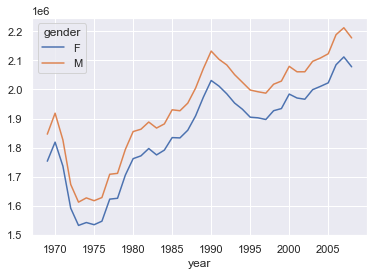

In [190]:
# LINE CHART - FROM A PIVOT TABLE:
import seaborn as sns

sns.set()
birth.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

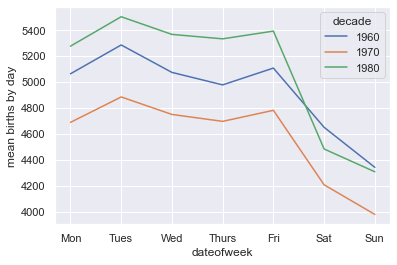

In [223]:
# AVERAGE NUMBER OF BIRTHS PER WEEKDAY
import numpy as np

birth=pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/births.csv')
# birth

quartiles=np.percentile(birth['births'], [25,50,75])
mu=quartiles[1] # 50
sig = 0.74 * (quartiles[2] - quartiles[0]) # 25 and 75
# 0.74 comes from the interquartile range of a Gaussian distribution
birth = birth.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')


birth.day=birth.day.astype(int)
# birth.info()
birth['decade']=(birth['year']//10)*10
birth['date']=pd.to_datetime(birth[['year', 'month', 'day']])
birth.index=birth.date
birth['dateofweek']=birth.index.dayofweek
# birth
birth.pivot_table('births', index='dateofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticks(list(range(0,7)))
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
# gca()= get current axes - provides a handle to the last active axes


[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

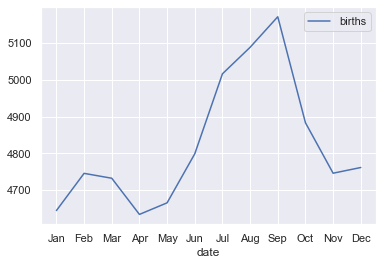

In [229]:
# AVERAGE NUMBER OF BIRTHS PER MONTH
import calendar

birth.pivot_table('births', index=birth.date.dt.month).plot()
plt.gca().set_xticks(list(range(1,13)))
plt.gca().set_xticklabels([calendar.month_abbr[i] for i in range(1,13)])

In [230]:
# ***************************************VECTORIZED STRING OPERATIONS***********************************************************
data = ['peter', 'Paul', None, 'MARY', 'gUIDO'] # iteration over the list with none results with error -> convert to pd.series
x=pd.Series(data) 
x.str.capitalize() # adding 'str'

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [233]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam','Eric Idle', 'Terry Jones', 'Michael Palin'])

#asking for a contiguous group of characters at the beginning of each character:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [244]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [246]:
# extract the last element:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [ ]:
# get_dummies() - split out into dataframe 0-1: (used for classification)

In [258]:
#***************************************DATE TIME:
# PYTHON:
import datetime   # datetime module
date=datetime.datetime(year=2022, month=2, day=6)
date

# dateutil module-parses dates from a variety of string formats:
from dateutil import parser
date=parser.parse('4th July 2020')
date

# FORMATING DATETIME OBJECT:
weekday=date.strftime('%A') # B=month, 
weekday

'Saturday'

In [259]:
# NUMPY:
# faster but it lacks many of the convenient methods and functions provided by datetime and especially dateutil.:
date=np.array('2022-02-06', dtype=np.datetime64)
date

array('2022-02-06', dtype='datetime64[D]')

In [260]:
# vectorized operation on NumPy date array:
date+np.arange(20) #adding next 20 days

array(['2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
       '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
       '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
       '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
       '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25'],
      dtype='datetime64[D]')

In [263]:
# PANDAS (the best of both above):
date=pd.to_datetime('4th July 2022')
date

date.strftime('%B')

'July'

In [264]:
date+pd.to_timedelta(12, 'D') 

Timestamp('2022-07-16 00:00:00')

In [270]:
# or the whole range:
date+pd.to_timedelta(np.arange(12), 'D') # 'W' weeks

DatetimeIndex(['2022-07-04', '2022-07-11', '2022-07-18', '2022-07-25',
               '2022-08-01', '2022-08-08', '2022-08-15', '2022-08-22',
               '2022-08-29', '2022-09-05', '2022-09-12', '2022-09-19'],
              dtype='datetime64[ns]', freq=None)

In [298]:
# DATETIMEINDEX:
date=np.array('2022-02-04', dtype=np.datetime64)
# index=date+np.arange(1500, step=365) better way:
# index=pd.date_range('2022-02-04', periods=20, freq='M') # D-day, M-month, A-year
index=pd.period_range('2022-02', periods=20, freq='M')
s=pd.Series(np.arange(20), 
           index=index)
s

2022-02     0
2022-03     1
2022-04     2
2022-05     3
2022-06     4
2022-07     5
2022-08     6
2022-09     7
2022-10     8
2022-11     9
2022-12    10
2023-01    11
2023-02    12
2023-03    13
2023-04    14
2023-05    15
2023-06    16
2023-07    17
2023-08    18
2023-09    19
Freq: M, dtype: int32

In [293]:
# indexing operations:
s['2023']

2023-01-31    11
2023-02-28    12
2023-03-31    13
2023-04-30    14
2023-05-31    15
2023-06-30    16
2023-07-31    17
2023-08-31    18
2023-09-30    19
Freq: M, dtype: int32

Pandas Time Series Data Structures:
-Timestamp: the combination of Python datetime & NumPy datetime64 (index= DatetimeIndex)
-Period: fixed frequency interval (index = PeriodIndex)
-Timedelta: timedeltas or durations (index = TimedeltaIndex)

Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex.

Ranges:
- timestamp:pd.date_range()
- period: pd.period_range()
- timedelta: pd.timedelta_range()

In [303]:
pd.timedelta_range(0, periods=6, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150T')

In [310]:
# business day offset (does not include weekends):
from pandas.tseries.offsets import BDay
date=pd.to_datetime('2022-02-03')
date.strftime('%A') #Thursday

pd.date_range(date, periods=6, freq=BDay())

DatetimeIndex(['2022-02-03', '2022-02-04', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10'],
              dtype='datetime64[ns]', freq='B')

<AxesSubplot:xlabel='Date'>

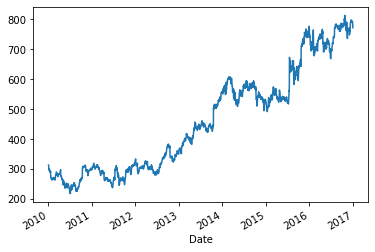

In [3]:
# PANDAS-DATAREADER PACKAGE - allows to import financial data from a number of available sources,
from pandas_datareader import data

# tickers = ['AAPL', 'MSFT', '^GSPC']
goog=data.DataReader('GOOG', source_name='yahoo', start='2010-01-01', end='2016-12-31') # surce_name ='yahoo' instead 'google'
goog.head()
goog=goog['Close']
goog.head()
goog.plot()

<AxesSubplot:xlabel='Date'>

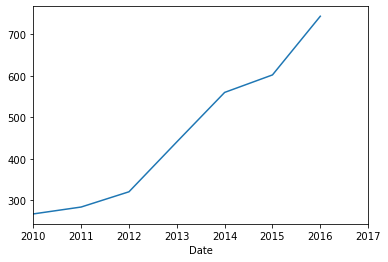

In [4]:
# resample()/asfreq() - for changing the time interval e.g. aggregate monthly data into yearly data
# resample = data aggregation
# asfreq=data selection

# downsampling — Resample to a wider time frame (from months to years)
# upsampling — Resample to a shorter time frame (from hours to minutes) => additional empty rows - might be filled with the methods: ffill, bfill
# or NaN - when asfreq() used with no arguments, then we can replace NaN with any value using fillna() 

goog.resample('BA').mean().plot(style='-') # BA=business year

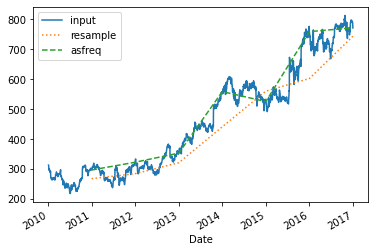

In [6]:
import matplotlib.pyplot as plt

goog.plot(style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],
         loc='upper left')

# resample - reports the average of the previous year
# asfreq - reports the value at the end of the year.

In [7]:
# ROLLING WINDOW FUNCTIONS:
#- window is a subset of rows that you perform a window calculation on.
df=data.DataReader('GOOG', 'yahoo', start='2010-01-01', end='2016-12-31')
df['Rolling sum - Open']=df['Open'].rolling(3).sum() # the sum of two previous rows
df.head()

,High,Low,Open,Close,Volume,Adj Close,Rolling sum - Open
Date,,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773,NaN
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926,NaN
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293,936.484833
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735,927.742584
2010-01-08,300.498657,293.455048,294.894653,299.885956,9484016.0,299.885956,910.218262


In [8]:
# RUNNING WINDOW FUNCTION:
#- cumsum() = cumulative sum of colums:
df['Running sum - Open']=df['Open'].cumsum(axis=0) #columns
df['Running sum - Open'].max()==df['Open'].sum() # True
df.head()

,High,Low,Open,Close,Volume,Adj Close,Rolling sum - Open,Running sum - Open
Date,,,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773,NaN,312.304413
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926,NaN,624.723389
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293,936.484833,936.484833
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735,927.742584,1240.046997
2010-01-08,300.498657,293.455048,294.894653,299.885956,9484016.0,299.885956,910.218262,1534.941650


In [122]:
# EXERCISE:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/Fremont_Bridge_Bicycle_Counter.csv',parse_dates=True, index_col='Date')
# df.index.freq = 'd'
df.columns=['Total', 'East', 'West']
df.describe()
df.isna().sum() # only 22-23 missing values in each column, might be removed 
df.dropna(inplace=True)
# df.info()
# df.describe()
# df.index.year.unique()
df=df.loc['2012-01-01 00:00:00':'2016-12-31 00:00:00']
df.head()


<ipython-input-122-197eb92b74ee>:13: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df=df.loc['2012-01-01 00:00:00':'2016-12-31 00:00:00']


,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


Text(0, 0.5, 'Hourly Bicycle Count')

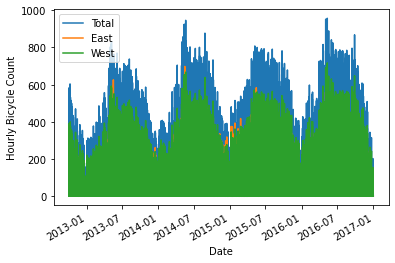

In [3]:
import matplotlib.pyplot as plt

df.plot()# line chart with hourly xaxis is so dense, we can resample by week
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly Bicycle Count')

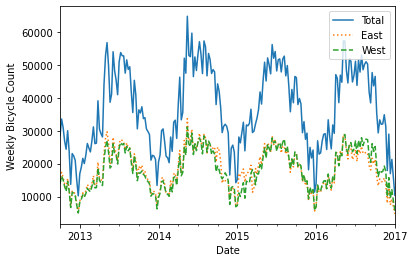

In [5]:
df.resample('W').sum().plot(style=['-', ':', '--'])
plt.ylabel('Weekly Bicycle Count')
# seasonal tredn - people bicycle more in the summer than in the winter

In [6]:
# rolling mean for 30 days:
#first resample df to days:
daily=df.resample('D').sum()
daily

,Total,East,West
Date,,,
2012-10-03,7042.0,3520.0,3522.0
2012-10-04,6950.0,3416.0,3534.0
2012-10-05,6296.0,3116.0,3180.0
2012-10-06,4012.0,2160.0,1852.0
2012-10-07,4284.0,2382.0,1902.0
...,...,...,...
2016-12-27,2210.0,994.0,1216.0
2016-12-28,2944.0,1288.0,1656.0
2016-12-29,2268.0,1022.0,1246.0


Text(0, 0.5, 'Mean Hourly Count')

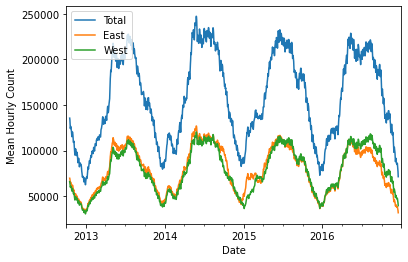

In [10]:
# next - rolling sum for 30 days:
daily.rolling(30, center=True).sum().plot()
plt.ylabel('Mean Hourly Count')

<AxesSubplot:xlabel='time'>

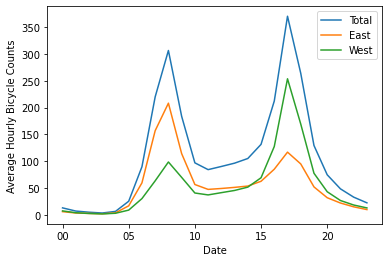

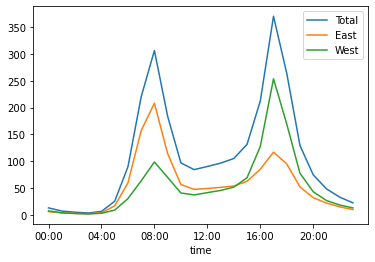

In [151]:
import numpy as np
#Hourly overview:
# df['hour']=df.index.strftime('%H')
# df.groupby('hour').mean().plot() # shorter:
df.groupby(df.index.strftime('%H')).mean().plot() # or df.groupby(df.index.time).mean().plot() 
plt.ylabel('Average Hourly Bicycle Counts')

#or another way:
by_time = df.groupby(df.index.time).mean()
#adjusting xticklabels every 4 hours:
hourly_ticks = 4 * 60 * 60 * np.arange(6) # 1 hour= 60 sek * 60 min, 24h/4 hours = 6 (np.arange(6))
by_time.plot(xticks=hourly_ticks)

<AxesSubplot:>

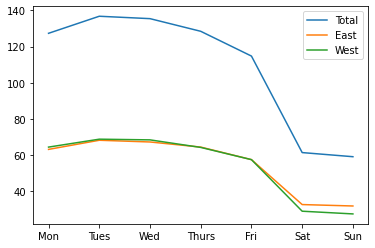

In [43]:
by_weekday=df.groupby(df.index.weekday).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

In [73]:
# HOURLY TREND - WORKING DAY vs WEEKEND

working_d=by_weekday.loc[~by_weekday.index.isin(['Sat', 'Sun'])]
weekend=by_weekday['Sat':'Sun']

# or:
# weekend=by_weekday['Sat':'Sun']
# index_wd=by_weekday.index.difference(weekend.index)
# working_d=by_weekday.loc[index_wd]

# in above dataframes index dtype is object - impossible to use resample()

Index(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], dtype='object')

Text(0.5, 1.0, 'Average Hourly Bicycles - Weekend')

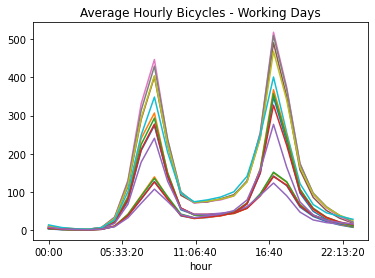

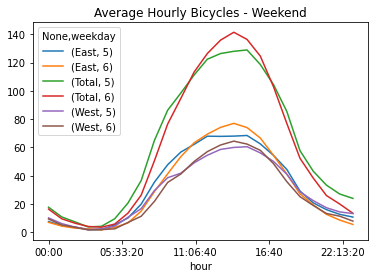

In [107]:
df['weekday']=df.index.weekday
df['hour']=df.index.time

weekend=df[df.weekday.isin([5,6])]
wd=df[~df.weekday.isin([5,6])]

wd.pivot_table(['Total', 'East', 'West'], index='hour', columns='weekday').plot(legend=None)
plt.title('Average Hourly Bicycles - Working Days')

weekend.pivot_table(['Total', 'East', 'West'], index='hour', columns='weekday').plot()
plt.title('Average Hourly Bicycles - Weekend')

<AxesSubplot:xlabel='time'>

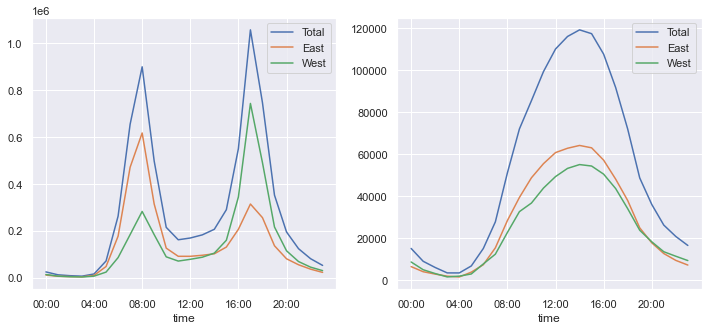

In [170]:
import seaborn as sns
# BETTER WAY:
weekday=np.where(df.index.weekday<5, 'WorkingDay', 'Weekend')
by_time=df.groupby([weekday, df.index.time]).sum()
# by_time.loc[by_time.index.get_level_values(0)=='Weekend'].plot(xticks=hourly_ticks)
fig, ax =plt.subplots(1,2, figsize=(12,5))
sns.set()
by_time.loc['WorkingDay'].plot(ax=ax[0], xticks=hourly_ticks)
by_time.loc['Weekend'].plot(ax=ax[1], xticks=hourly_ticks)

In [184]:
#*************************************************PANDAS: EVAL & QUERY
# depend on NumPy numexpr module
# eval() - expression constructed as a string
# exists: Dataframe.eval() - columns can be referred to by name
# and pd.eval() - using dataframe name
# memory use- does not create a temporary array

rng=np.random.RandomState(42)

df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (1000000, 3))) # 5 dataframes - 1000000 rows and 3 columns each
                            for i in range(5))

# df1.head()

In [185]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
%timeit result1
%timeit result2

54.9 ns ± 0.537 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
50.4 ns ± 0.446 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [187]:
df=pd.DataFrame(rng.rand(1000,3), columns=list('ABC'))
df

,A,B,C
0,0.656105,0.560014,0.039065
1,0.821801,0.842189,0.563954
2,0.914203,0.568622,0.597651
3,0.799708,0.661826,0.120592
4,0.800201,0.789363,0.836883
...,...,...,...
995,0.408025,0.861264,0.309042
996,0.017124,0.743197,0.877600
997,0.149147,0.234023,0.019301
998,0.118123,0.170816,0.792084


In [206]:
# new column:
df.eval('D=(A+B)/C', inplace=True) # in pd would be: 
pd.eval('E=(df.A+df.B)/df.C', target=df, inplace=True)
df.head()

,A,B,C,D,E
0,0.656105,0.560014,0.039065,31.131022,31.131022
1,0.821801,0.842189,0.563954,2.950577,2.950577
2,0.914203,0.568622,0.597651,2.481086,2.481086
3,0.799708,0.661826,0.120592,12.119618,12.119618
4,0.800201,0.789363,0.836883,1.899385,1.899385


In [197]:
# using local variables:
# available only for DataFrame.eval, not working in pandas.eval
col_mean=df.mean(axis=1) # average of each row

df.eval('A-@col_mean')

0     -7.440446
1     -0.472829
2     -0.226188
3     -2.625728
4     -0.281257
         ...   
995   -1.013350
996   -0.608947
997   -4.914618
998   -0.243328
999   -2.768547
Length: 1000, dtype: float64

In [198]:
# QUERY:
df.query('A < @col_mean & B < @col_mean')

,A,B,C,D
0,0.656105,0.560014,0.039065,31.131022
1,0.821801,0.842189,0.563954,2.950577
2,0.914203,0.568622,0.597651,2.481086
3,0.799708,0.661826,0.120592,12.119618
4,0.800201,0.789363,0.836883,1.899385
...,...,...,...,...
994,0.062456,0.145766,0.466866,0.446000
995,0.408025,0.861264,0.309042,4.107170
997,0.149147,0.234023,0.019301,19.852590
998,0.118123,0.170816,0.792084,0.364784
